In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import get_window
import soundfile as sf
import urllib.request
from IPython.display import Audio

import pandas as pd
import pretty_midi


### D#
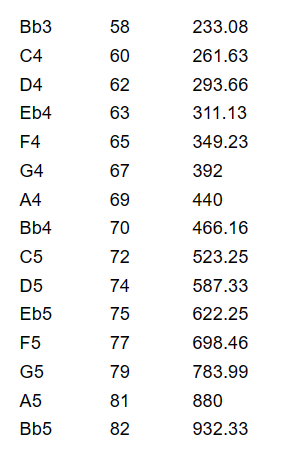

E
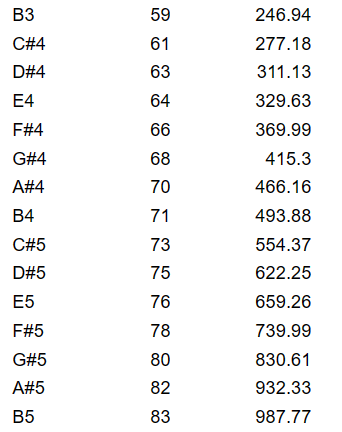

In [2]:
def convert_midi_note(note_to_convert):

    if note_to_convert==58:
        midi_converted = "Bb3" 
    elif note_to_convert==59:
        midi_converted = "B3"    
    elif note_to_convert==60:
        midi_converted = "C4"
    elif note_to_convert==61:
        midi_converted = "Db4"    
    elif note_to_convert==62:
        midi_converted = "D4" 
    elif note_to_convert==63:
        midi_converted = "Eb4"
    elif note_to_convert==64:
        midi_converted = "E4"    
    elif note_to_convert==65:
        midi_converted = "F4"
    elif note_to_convert==66:
        midi_converted = "Gb4"    
    elif note_to_convert==67:
        midi_converted = "G4"
    elif note_to_convert==68:
        midi_converted = "Ab4"    
    elif note_to_convert==69:
        midi_converted = "A4"
    elif note_to_convert==70:
        midi_converted = "Bb4" 
    elif note_to_convert==71:
        midi_converted = "B4"     
    elif note_to_convert==72:
        midi_converted = "C5"
    elif note_to_convert==73:
        midi_converted = "Db5"    
    elif note_to_convert==74:
        midi_converted = "D5"   
    elif note_to_convert==75:
        midi_converted = "Eb5"
    elif note_to_convert==76:
        midi_converted = "E5"    
    elif note_to_convert==77:
        midi_converted = "F5"
    elif note_to_convert==78:
        midi_converted = "Gb5"    
    elif note_to_convert==79:
        midi_converted = "G5"
    elif note_to_convert==80:
        midi_converted = "Ab5"    
    elif note_to_convert==81:
        midi_converted = "A5" 
    elif note_to_convert==82:
        midi_converted = "Bb5" 
    else:
        midi_converted = "NaN"
        
    return midi_converted     

In [3]:
def convert_note_midi(midi_to_convert):

    if midi_to_convert=="Bb3":
        note_converted = 58 
    elif midi_to_convert=="B3":
        note_converted = 59    
    elif midi_to_convert=="C4":
        note_converted = 60
    elif midi_to_convert=="Db4":
        note_converted = 61    
    elif midi_to_convert=="D4":
        note_converted = 62 
    elif midi_to_convert=="Eb4":
        note_converted = 63
    elif midi_to_convert=="E4":
        note_converted = 64    
    elif midi_to_convert=="F4":
        note_converted = 65
    elif midi_to_convert=="Gb4":
        note_converted = 66    
    elif midi_to_convert=="G4":
        note_converted = 67
    elif midi_to_convert=="Ab4":
        note_converted = 68    
    elif midi_to_convert=="A4":
        note_converted = 69
    elif midi_to_convert=="Bb4":
        note_converted = 70 
    elif midi_to_convert=="B4":
        note_converted = 71     
    elif midi_to_convert=="C5":
        note_converted = 72
    elif midi_to_convert=="Db5":
        note_converted = 73    
    elif midi_to_convert=="D5":
        note_converted = 74 
    elif midi_to_convert=="Eb5":
        note_converted = 75
    elif midi_to_convert=="E5":
        note_converted = 76    
    elif midi_to_convert=="F5":
        note_converted = 77
    elif midi_to_convert=="Gb5":
        note_converted = 78    
    elif midi_to_convert=="G5":
        note_converted = 79
    elif midi_to_convert=="Ab5":
        note_converted = 80    
    elif midi_to_convert=="A5":
        note_converted = 81 
    elif midi_to_convert=="Bb5":
        note_converted = 82 
    else:
        note_converted = 0
        
    return note_converted   

In [7]:
plt.rcParams["figure.figsize"] = [14, 4]
plt.rcParams["figure.autolayout"] = True

interval_duration = 0.0625
threshold_norm = 0.05
midi_threshold = 58
zero_segment_threshold = 0.5
eps = 1e-7

threshold_duration_15 = int(1.5/interval_duration)
threshold_duration_40 = int(4/interval_duration)

# Alap: E
# AudioSource, Flute: D#
my_midis_Dsharp = [58, 60, 62, 63, 65, 67, 69, 70, 72, 74, 75, 77, 79, 81, 82,0] 
my_notes_Dsharp = ["Bb3", "C4", "D4", "Eb4","F4", "G4", "A4", "Bb4", "C5", "D5", "Eb5", "F5", "G5", "A5", "Bb5","NaN"]


my_midis_E = [59, 61, 63, 64, 66, 68, 70, 71, 73, 75, 76, 78, 80, 82, 83,0] 
my_notes_E = ["B3", "Db4", "Eb4", "E4","Gb4", "Ab4", "Bb4", "B4", "Db5", "Eb5", "E5", "Gb5", "Ab5", "Bb5", "B5","NaN"]
my_midis = my_midis_Dsharp
my_notes = my_notes_Dsharp

In [8]:
# Upward :  D  F G A  C D     
# Downward: Eb D C Bb A G F Eb 

my_midis_Dsharp_upward = [58,     60,   62,   63,   65,   67,   69,   70,    72,   74,   75,    77,   79,   81,   82,   0] 
my_notes_Dsharp_upward = ["Bb3", "C4", "D4", "Eb4","F4", "G4", "A4", "Bb4", "C5", "D5", "Eb5", "F5", "G5", "A5", "Bb5","NaN"]

my_midis_Dsharp_downward = [58, 60, 62, 63, 65, 67, 69, 70, 72, 74, 75, 77, 79, 81, 82, 0] 
my_notes_Dsharp_downward = ["Bb3", "C4", "D4", "Eb4","F4", "G4", "A4", "Bb4", "C5", "D5", "Eb5", "F5", "G5", "A5", "Bb5","NaN"]


def jump_or_not(note_1, note_2):
    midi_note_1 =  convert_note_midi(note_1)
    midi_note_2 =  convert_note_midi(note_2)
    
    note_motion =  my_midis_Dsharp.index(midi_note_2) - my_midis_Dsharp.index(midi_note_1)
    if(note_motion>=3) :
        #print("Up - Jump ", note_motion)
        jump = True
        #print(note_1, "Note1:",midi_note_1, note_2, "Note2:",midi_note_2, "Motion: ",note_motion)
    elif ((note_motion==2) &  ((note_1=="D4") or (note_1=="D5") or (note_1=="A4") or (note_1=="A5")  )):
        #print("Up - Step ", note_motion)
        jump = False
    elif (note_motion==2):
        #print("Up - Jump ", note_motion)
        jump = True
        #print(note_1, "Note1:",midi_note_1,"Note2:",midi_note_2, "Motion: ",note_motion)
    elif (note_motion==1):
        #print("Up - Step ", note_motion)
        jump = False
    elif(note_motion<=-2):  
        #print("Down - Jump ", note_motion)
        jump = True
        #print(note_1, "Note1:",midi_note_1, note_2, "Note2:",midi_note_2, "Motion: ",note_motion)
    elif(note_motion==-1):  
        #print("Down - Step ", note_motion)
        jump = False
    elif(note_motion==0):  
        #print("Same ", note_motion)   
        jump = False
     
    return jump

In [19]:
jump_or_not("C4", "C4")

False

In [20]:
def remove_nans(list_with_nans):
    
    list_without_nans = []
    list_without_nans_index = []
    for m in range(len(list_with_nans)):
        row_without_nans = []
        row_without_nans_index = []
        for i in range(len(list_with_nans[m])):
            if (list_with_nans[m][i]!="NaN"):
                row_without_nans.append(list_with_nans[m][i])
                row_without_nans_index.append(i)
        list_without_nans.append(row_without_nans)
        list_without_nans_index.append(row_without_nans_index)
        
    df_nan = pd.DataFrame(list_without_nans) 
    df_nan.index.names = ['Phrase Number']
    df_nan
    return list_without_nans , list_without_nans_index

In [21]:
def midi_counter(midis_df_in, phrase_in):
    unique, counts = np.unique(phrase_in, return_counts=True)
    #print("Unique", unique)
    #print("Counts", counts)
    #print("Midis_df_in", midis_df_in)
    #print("M COUNTER", midis_df_in)
    for i in range(len(unique)):
        #print(i, unique[i] , counts[i])
        midis_df_in.iat[midis_df_in[midis_df_in.Midi==int(unique[i])].iat[0,0],3] = counts[i] + midis_df_in.iat[midis_df_in[midis_df_in.Midi==int(unique[i])].iat[0,0],3]
    
    #print("M COUNTER OUT", midis_df_in)
    
    return midis_df_in 

In [22]:
def notes_in_phrase(my_phrases_note):

    my_note = my_phrases_note[4][0]
    note_length = 1
    my_notes = []
    my_notes_length = []

    for i in range(len(my_phrases_note)-1):
        my_note = my_phrases_note[i]
        if(my_phrases_note[i+1]==my_phrases_note[i]):
            note_length = note_length +1
        else:
            my_notes.append(my_note)
            my_notes_length.append(note_length)
            my_note = my_phrases_note[i+1]
            note_length = 1
        
    my_notes.append(my_note)
    my_notes_length.append(note_length)            
  
    return [my_notes, my_notes_length]

In [23]:
midi_notes = [my_midis , my_notes]
midi_notes_df = pd.DataFrame (midi_notes).transpose()
midi_notes_df.columns = ['Midi', 'Note']
midi_notes_df

,Midi,Note
0,58,Bb3
1,60,C4
2,62,D4
3,63,Eb4
4,65,F4
5,67,G4
6,69,A4
7,70,Bb4
8,72,C5
9,74,D5


In [24]:
audio_file = "ron_mono_protools.wav"

x_in, fs = sf.read(audio_file)

In [25]:
x_in.shape

(46569600,)

In [ ]:
'''
# Convert tp mono
xx = (x_in[:,0] + x_in[:,1])/2
xx.shape
'''

Sampling Frequency is:  44100
Length of the signal is 1056.0  seconds


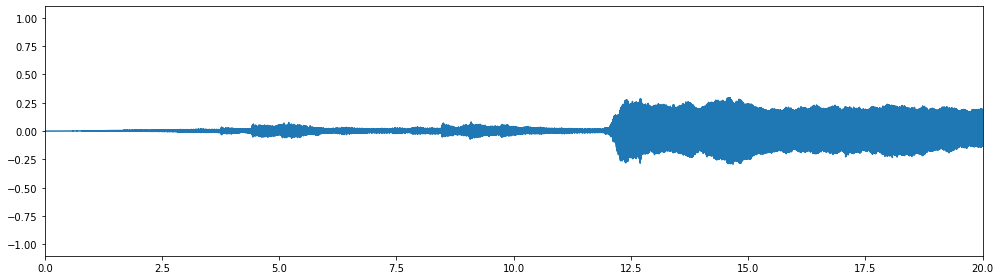

In [26]:


'''
# Convert stereo to mono
if (x_in.shape[1]==2):
    x_left = x_in[:,0]
    x_rigth = x_in[:,0]
    x = (x_left + x_rigth)/2
else:
    x = x_in
''' 

#x = np.float32(x_in[0:300*44100])
x = np.float32(x_in)
print("Sampling Frequency is: ", fs)
print("Length of the signal is", len(x)/fs ," seconds")

#plt.figure(figsize=(18,6))
time_s32 = np.linspace(0, len(x)/fs, len(x))
time_s = np.float32(time_s32)
time_s32.dtype
plt.plot(time_s, x)
plt.xlim(0, 20);

In [27]:
x = x-np.average(x)
xmax = max(x)
x = x/xmax
#for i in range(len(xnorm)):
#    if np.abs(xnorm[i])<threshold_norm:
#        xnorm[i] = 0



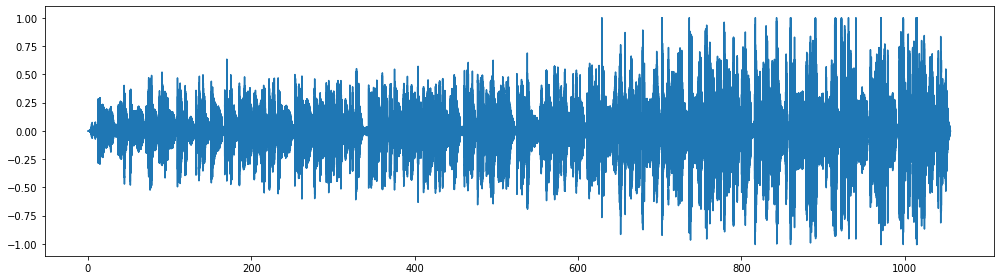

In [28]:
#plt.figure(figsize=(18,6))
plt.plot(time_s,x);
#plt.xlim(0, 100);

In [29]:
sv_freq_df = pd.read_csv("AudioSource_Essentia.csv",header=None)
sv_freq_df = sv_freq_df.rename(columns={0: "Time", 1: "Frequency"})
est_time_sv = sv_freq_df["Time"].to_numpy()
est_freq_sv = sv_freq_df["Frequency"].to_numpy()

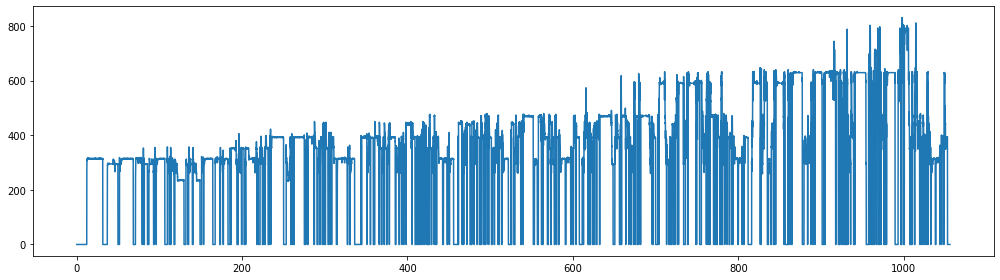

In [30]:
plt.plot(est_time_sv, est_freq_sv);

In [31]:
est_freq_sv.shape , est_time_sv.shape 

((237601,), (237601,))

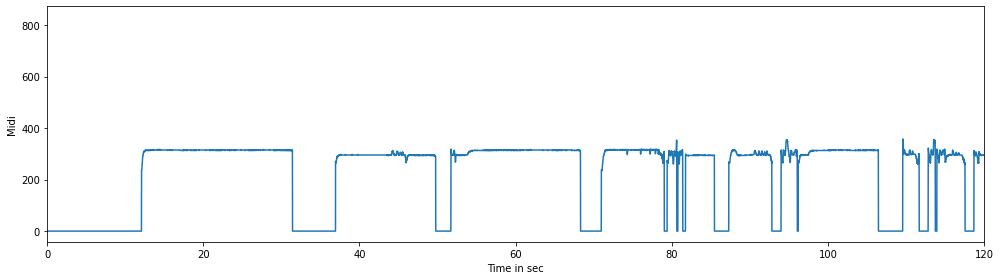

In [32]:
plt.plot(est_time_sv,est_freq_sv);
plt.xlim(0, 120)
plt.xlabel("Time in sec")
plt.ylabel("Midi");

In [33]:
sec_count = interval_duration
start_index = 0
start_idx = []
end_idx = []
for i in range(len(est_time_sv)):
    if est_time_sv[i]>=sec_count:
        end_index = i-1
        start_idx.append(start_index)
        end_idx.append(end_index)
        sec_count+=interval_duration
        start_index = end_index+1

In [34]:
len(start_idx), len(end_idx)

(16896, 16896)

In [35]:
frequency_avg_perinterval_sv = []
frequency_avg_ex0_perinterval_sv = []
frequency_med_perinterval_sv = []
frequency_med_ex0_perinterval_sv = []
frequency_all_perinterval_sv = []

midi_avg_perinterval_sv = []
midi_avg_ex0_perinterval_sv = []
midi_med_perinterval_sv = []
midi_med_ex0_perinterval_sv = []
midi_all_perinterval_sv = []

time_intervals_sv = []


for i in range(len(start_idx)):
    avg_frequency_sv = np.average(est_freq_sv[start_idx[i]:end_idx[i]+1])
    if (np.count_nonzero(est_freq_sv[start_idx[i]:end_idx[i]+1])>0):
        avg_ex0_frequency_sv = np.sum(est_freq_sv[start_idx[i]:end_idx[i]+1])/np.count_nonzero(est_freq_sv[start_idx[i]:end_idx[i]+1])
    else:
        avg_ex0_frequency_sv = 0 
        
    med_frequency_sv = np.median(est_freq_sv[start_idx[i]:end_idx[i]+1])
    
    if (np.count_nonzero(est_freq_sv[start_idx[i]:end_idx[i]+1])>0):
        med_ex0_frequency_sv = np.median(np.trim_zeros(est_freq_sv[start_idx[i]:end_idx[i]+1]))
    else:
        med_ex0_frequency_sv = 0 
    
    
    frequency_avg_perinterval_sv.append(avg_frequency_sv)
    frequency_avg_ex0_perinterval_sv.append(avg_ex0_frequency_sv)
    frequency_med_perinterval_sv.append(med_frequency_sv)
    frequency_med_ex0_perinterval_sv.append(med_ex0_frequency_sv)
    frequency_all_avg = (avg_frequency_sv+avg_ex0_frequency_sv+med_frequency_sv+med_ex0_frequency_sv)/4
    frequency_all_perinterval_sv.append(frequency_all_avg)
    time_intervals_sv.append(i*interval_duration) 
    
    midi_avg_sv_raw = 12 * np.log2(avg_frequency_sv/440+eps) + 69
    midi_avg_sv = round(midi_avg_sv_raw)
   
    midi_avg_ex0_sv_raw = 12 * np.log2(avg_ex0_frequency_sv/440+eps) + 69
    midi_avg_sv_ex0 = round(midi_avg_ex0_sv_raw)
    
    midi_med_sv_raw = 12 * np.log2(med_frequency_sv/440+eps) + 69
    midi_med_sv = round(midi_med_sv_raw)
    
    midi_med_ex0_sv_raw = 12 * np.log2(med_ex0_frequency_sv/440+eps) + 69
    midi_med_ex0_sv = round(midi_med_ex0_sv_raw)
   
    midi_all_sv_raw = 12 * np.log2(frequency_all_avg/440+eps) + 69
    midi_all_sv = round(midi_all_sv_raw)
    
    #print("Start: ", start_idx[i], "Start Time: ", est_time_sv[start_idx[i]], "End: ", end_idx[i], "End Time: ", est_time_sv[end_idx[i]],"Med Fre: ", med_frequency_sv, "Med Midi: ", midi_med_sv_raw)
    
    if midi_avg_sv>my_midis[-2:][0]:
        midi_avg_perinterval_sv.append(0)
    elif midi_avg_sv<midi_threshold:
        midi_avg_perinterval_sv.append(0)
    elif (midi_avg_sv in my_midis): 
        midi_avg_perinterval_sv.append(midi_avg_sv)
    elif (midi_avg_sv-midi_avg_sv_raw)>0:
        midi_avg_perinterval_sv.append(np.floor(midi_avg_sv_raw)) 
    else:
        midi_avg_perinterval_sv.append(np.ceil(midi_avg_sv_raw)) 
    
    if midi_avg_sv_ex0>my_midis[-2:][0]:
        midi_avg_ex0_perinterval_sv.append(0)
    elif midi_avg_sv_ex0<midi_threshold:
        midi_avg_ex0_perinterval_sv.append(0)
    elif (midi_avg_sv_ex0 in my_midis): 
        midi_avg_ex0_perinterval_sv.append(midi_avg_sv_ex0)     
    elif (midi_avg_sv_ex0-midi_avg_ex0_sv_raw)>0:
        midi_avg_ex0_perinterval_sv.append(np.floor(midi_avg_ex0_sv_raw)) 
    else:
        midi_avg_ex0_perinterval_sv.append(np.ceil(midi_avg_ex0_sv_raw))
        
    if midi_med_sv>my_midis[-2:][0]:
        midi_med_perinterval_sv.append(0)
    elif midi_med_sv<midi_threshold:
        midi_med_perinterval_sv.append(0)
    elif (midi_med_sv in my_midis): 
        midi_med_perinterval_sv.append(midi_med_sv)
    elif (midi_med_sv-midi_med_sv_raw)>0:
        midi_med_perinterval_sv.append(np.floor(midi_med_sv_raw)) 
    else:
        midi_med_perinterval_sv.append(np.ceil(midi_med_sv_raw))  
        
    if midi_med_ex0_sv>my_midis[-2:][0]:
        midi_med_ex0_perinterval_sv.append(0)
    elif midi_med_ex0_sv<midi_threshold:
        midi_med_ex0_perinterval_sv.append(0)
    elif (midi_med_ex0_sv in my_midis): 
        midi_med_ex0_perinterval_sv.append(midi_med_ex0_sv)
    elif (midi_med_ex0_sv-midi_med_ex0_sv_raw)>0:
        midi_med_ex0_perinterval_sv.append(np.floor(midi_med_ex0_sv_raw)) 
    else:
        midi_med_ex0_perinterval_sv.append(np.ceil(midi_med_ex0_sv_raw))    
                                       
    if midi_all_sv>my_midis[-2:][0]:
        midi_all_perinterval_sv.append(0)
    elif midi_all_sv<midi_threshold:
        midi_all_perinterval_sv.append(0)
    elif (midi_all_sv in my_midis): 
        midi_all_perinterval_sv.append(midi_all_sv)
    elif (midi_all_sv- midi_all_sv_raw)>0:
        midi_all_perinterval_sv.append(np.floor(midi_all_sv_raw)) 
    else:
        midi_all_perinterval_sv.append(np.ceil( midi_all_sv_raw)) 

In [36]:
my_midis_sv = midi_med_perinterval_sv

In [37]:
my_midis_sv[15950:15960]

[0, 0, 0, 0, 79, 79, 0, 0, 0, 0]

In [38]:
temp_count = 0
threshold_shorts = 2
shorts_idx = []
shorts_length = []

for i in range(len(my_midis_sv)):
    if(my_midis_sv[i]!=0):
        temp_count = temp_count +1
    if(my_midis_sv[i]==0):
        if(temp_count<=threshold_shorts) & (temp_count!=0) :
            print(i,temp_count)
            shorts_idx.append(i)
            shorts_length.append(temp_count)
        temp_count = 0

print(shorts_length)        
        
for i in range(len(shorts_length)):
    for j in range (shorts_length[i]):
        #print(shorts_idx[i]-j-1)
        my_midis_sv[shorts_idx[i]-j-1] = 0 

15956 2
[2]


In [39]:
my_midis_sv[15660:15670] , my_midis_sv[15950:15960]

([0, 0, 0, 0, 69, 69, 69.0, 0, 75, 75], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
note_avg_perinterval_sv = []
for i in range(len(my_midis_sv)):
    note_avg_perinterval_sv.append(convert_midi_note(my_midis_sv[i]))
    
sv_df = pd.DataFrame(time_intervals_sv)    
sv_df.columns = ['Time']   
sv_df["Midi"] = my_midis_sv
sv_df["Note"] = note_avg_perinterval_sv

sv_df.to_csv("AudioSource_MIDI.csv", index=True)

sv_df


,Time,Midi,Note
0,0.0000,0.0,NaN
1,0.0625,0.0,NaN
2,0.1250,0.0,NaN
3,0.1875,0.0,NaN
4,0.2500,0.0,NaN
...,...,...,...
16891,1055.6875,0.0,NaN
16892,1055.7500,0.0,NaN
16893,1055.8125,0.0,NaN
16894,1055.8750,0.0,NaN


In [41]:
sv_df["MidiYes"] = sv_df["Midi"]
sv_df["MidiYesDiff"] = sv_df["Midi"]

In [42]:
sv_df

,Time,Midi,Note,MidiYes,MidiYesDiff
0,0.0000,0.0,NaN,0.0,0.0
1,0.0625,0.0,NaN,0.0,0.0
2,0.1250,0.0,NaN,0.0,0.0
3,0.1875,0.0,NaN,0.0,0.0
4,0.2500,0.0,NaN,0.0,0.0
...,...,...,...,...,...
16891,1055.6875,0.0,NaN,0.0,0.0
16892,1055.7500,0.0,NaN,0.0,0.0
16893,1055.8125,0.0,NaN,0.0,0.0
16894,1055.8750,0.0,NaN,0.0,0.0


In [43]:
for i in range(len(sv_df)):
    if(sv_df.Midi[i]!=0):
        sv_df.MidiYes[i] = 1    
        
for i in range(1,len(sv_df)):
    sv_df.MidiYesDiff[i] =  sv_df.MidiYes[i] - sv_df.MidiYes[i-1]   
    

C:\Users\yavuz\AppData\Local\Temp/ipykernel_10528/2136602875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_df.MidiYes[i] = 1
C:\Users\yavuz\AppData\Local\Temp/ipykernel_10528/2136602875.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_df.MidiYesDiff[i] =  sv_df.MidiYes[i] - sv_df.MidiYes[i-1]


In [44]:
midi_notes = []
time_start = []

midi_notes.append(sv_df.Midi[0])
time_start.append(sv_df.Time[0])


for i in range(len(sv_df)-1):
    if sv_df.Midi[i+1]!=sv_df.Midi[i]:
        midi_notes.append(int(sv_df.Midi[i+1]))
        time_start.append(sv_df.Time[i+1])  


df_sv_midi = pd.DataFrame([time_start,midi_notes]).transpose()
df_sv_midi.columns = ['Start', 'Midi']
df_sv_midi["Midi"] = df_sv_midi["Midi"].astype(int)        

In [45]:
zeroends_sv = sv_df[sv_df.MidiYesDiff==1]["Time"]

In [46]:
df_sv_nonzeros = df_sv_midi[df_sv_midi.Midi!=0]
df_sv_nonzeros = df_sv_nonzeros.reset_index(drop=True)
df_sv_zeros = df_sv_midi[df_sv_midi.Midi==0]
df_sv_zeros = df_sv_zeros.reset_index(drop=True)


In [47]:
zeros_start = []
zeros_ends = []
for i in range(len(zeroends_sv)):
    zeros_start.append(df_sv_zeros.Start[i])
    zeros_ends.append(np.array(zeroends_sv)[i]-interval_duration)
    
zeros_start.append(df_sv_zeros.Start[-1:].item()) 
zeros_ends.append(sv_df.Time[-1:].item())

zero_segments_sv = pd.DataFrame ([zeros_start , zeros_ends , list(np.subtract(np.array(zeros_ends), np.array(zeros_start))) ]).transpose()
zero_segments_sv.columns = ['Start', 'End', "Duration"]


In [48]:
zero_segments_sv

,Start,End,Duration
0,0.0000,12.0000,12.0000
1,31.4375,36.8750,5.4375
2,49.7500,51.6250,1.8750
3,68.3125,70.9375,2.6250
4,79.0625,79.3750,0.3125
...,...,...,...
225,1038.1875,1039.0000,0.8125
226,1043.5625,1043.8750,0.3125
227,1045.7500,1046.0625,0.3125
228,1048.5000,1048.7500,0.2500


In [49]:
zero_segments_longer_sv = zero_segments_sv[zero_segments_sv.Duration>=zero_segment_threshold]
zero_segments_longer_sv

,Start,End,Duration
0,0.0000,12.0000,12.0000
1,31.4375,36.8750,5.4375
2,49.7500,51.6250,1.8750
3,68.3125,70.9375,2.6250
7,85.4375,87.2500,1.8125
...,...,...,...
219,1019.2500,1019.9375,0.6875
221,1022.9375,1023.5000,0.5625
223,1027.2500,1027.8125,0.5625
225,1038.1875,1039.0000,0.8125


In [ ]:
#plt.plot(time_intervals_sv,frequency_avg_ex0_perinterval_sv,"red")
#plt.plot(time_intervals_sv,frequency_avg_perinterval_sv,"black")
#plt.plot(time_intervals_sv,frequency_med_perinterval_sv,"green")
#plt.plot(time_intervals_sv,frequency_med_ex0_perinterval_sv,"black")
#plt.plot(time_intervals_sv,frequency_all_perinterval_sv,"blue")
#plt.xlim(997,999);

In [ ]:
#plt.plot(time_intervals_sv,midi_avg_ex0_perinterval_sv,"red")
#plt.plot(time_intervals_sv,midi_avg_perinterval_sv,"black")
#plt.plot(time_intervals_sv,midi_med_perinterval_sv,"green")
#plt.plot(time_intervals_sv,midi_all_perinterval_sv,"blue")
#plt.xlim(490,503);

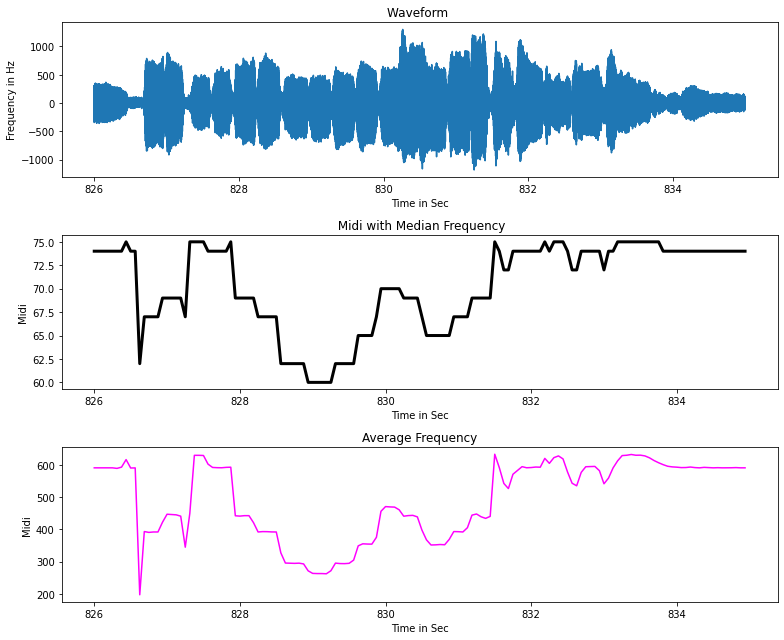

In [190]:
start_time = 826
end_time = 835
sampling = 10
time_ss = np.arange(0,len(time_s),sampling)

plt.figure(figsize=(11,9))

plt.subplot(3,1,1)
plt.plot(time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]/fs, 1500*x[time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]])
plt.title("Waveform ")
plt.xlabel("Time in Sec")
plt.ylabel("Frequency in Hz")


plt.subplot(3,1,2)
#plt.plot(time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]/fs, 120*x[time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]])
plt.title(" Midi with Median Frequency")
plt.xlabel("Time in Sec")
plt.ylabel("Midi")
plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), my_midis_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="black", linewidth=3);
#plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), midi_med_perinterval_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="green", linewidth=3);
#plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), frequency_avg_perinterval_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="magenta");

#plt.ylim(0, 80);

plt.subplot(3,1,3)
#plt.plot(time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]/fs, 120*x[time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]])
plt.title("Average Frequency")
plt.xlabel("Time in Sec")
plt.ylabel("Midi")
#plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), my_midis_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="black", linewidth=3);
plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), frequency_avg_perinterval_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="magenta");

#plt.ylim(0, 80);

In [51]:
df_sv_midi

,Start,Midi
0,0.0000,0
1,12.0625,58
2,12.1875,62
3,12.3125,63
4,31.4375,0
...,...,...
2200,1050.3750,69
2201,1050.6250,67
2202,1050.6875,65
2203,1051.0000,67


In [52]:
# Create a PrettyMIDI object
#my_tempo = int(60/interval_duration/4)
my_tempo = int(60/0.125/4)
cello_c_chord_sv = pretty_midi.PrettyMIDI(initial_tempo=my_tempo)

# Create an Instrument instance for a cello instrument
cello_program_sv = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program_sv)


for i in range(len(df_sv_midi)-1):
#for i in range(20):
    #print("Midi",df_sv_midi.Midi[i], " Start", df_sv_midi.Start[i] )
    if(df_sv_midi.Midi[i]>=58):
        note = pretty_midi.Note(velocity=50, pitch=df_sv_midi.Midi[i], start=df_sv_midi.Start[i], end=df_sv_midi.Start[i+1])
        #print(note)
        cello.notes.append(note)
    

cello_c_chord_sv.instruments.append(cello)

cello_c_chord_sv.write('AudioSource_Essentia_converted.mid')

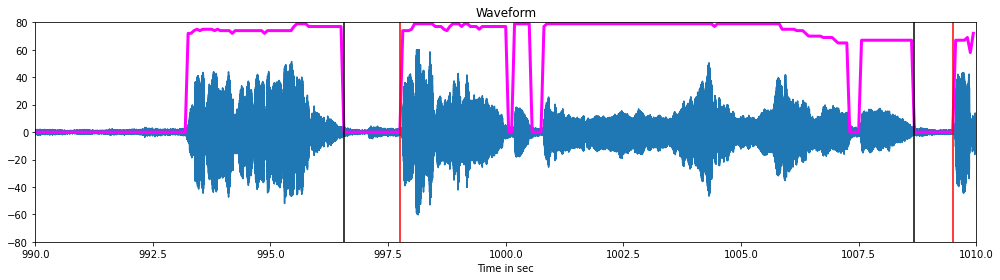

In [53]:


start_time = 990
end_time = 1010
sampling = 10

zeros_segments_inframe = zero_segments_longer_sv[(zero_segments_longer_sv.Start>=start_time) & (zero_segments_longer_sv.End<=end_time)]
zeros_segments_inframe = zeros_segments_inframe.reset_index(drop=True)



time_ss = np.arange(0,len(time_s),sampling)

plt.plot(time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]/fs, 60*x[time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]])
plt.title("Waveform")
plt.xlabel("Time in sec");


plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), my_midis_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="magenta", linewidth=3);


plt.axvline(x=zero_segments_sv.Start[0], color='black')
plt.axvline(x=zero_segments_sv.End[0], color='red')
plt.axvline(x=0, color='black')
for i in range(len(zeros_segments_inframe)):
    plt.axvline(x=zeros_segments_inframe.Start[i], color='black')
    plt.axvline(x=zeros_segments_inframe.End[i], color='red')



plt.ylim(-80, 80)
plt.xlim(start_time, end_time);    

In [54]:
# zero_segments_longer_sv

midi_notes = [my_midis , my_notes]
midi_notes_df = pd.DataFrame (midi_notes).transpose()
midi_notes_df.columns = ['Midi', 'Note']
midi_notes_df["Count"] = 0

midi_notes_df.reset_index(inplace=True)

start_idxes = []
end_idxes = []
start_midi = []
end_midi = []
start_note = []
end_note = []
phrases_midi= []
phrases_note= []
print("Number of Phrases: ", len(zero_segments_longer_sv)-1)

for i in range(len(zero_segments_longer_sv)-1):

    start_idx = (int(zero_segments_longer_sv.iloc[i,1]/interval_duration)+1)
    end_idx = (int(zero_segments_longer_sv.iloc[i+1,0]/interval_duration)-1)
    start_idxes.append(start_idx)
    end_idxes.append(end_idx)
   
    phrase_midi = (my_midis_sv[start_idx:end_idx+1])
    phrase_midi
    
    phrase_note = []
    for m in range(len(phrase_midi)):
        phrase_note.append(convert_midi_note(phrase_midi[m]))
                           
    phrases_midi.append(phrase_midi)
    phrases_note.append(phrase_note)
    
 
    midi_notes_df = midi_counter(midi_notes_df, phrase_midi)
       
    start_midi.append(int(phrase_midi[0]))
    end_midi.append(int(phrase_midi[-1]))
  
    start_note.append(convert_midi_note(int(phrase_midi[0])))
    end_note.append(convert_midi_note(int(phrase_midi[-1])))
    
  

Number of Phrases:  111


In [ ]:
start_idxes[0:4] , end_idxes[0:4]

In [ ]:
start_midi[0:4] , end_midi[0:4] , start_note[0:4] , end_note[0:4]

In [ ]:
midi_notes_df 

In [55]:
start_note_index = []
end_note_index = []
start_note_time = []
end_note_time = []
for i in range(len(start_midi)):
    start_note_index.append(start_idxes[i])
    end_note_index.append(end_idxes[i])
    start_note_time.append(start_idxes[i]*interval_duration)
    end_note_time.append(end_idxes[i]*interval_duration)
    



In [56]:
df_phrases = pd.DataFrame(phrases_note) 
df_phrases.index.names = ['Phrase Number']
df_phrases["Start ID"] = start_note_index
df_phrases["End ID"] = end_note_index
df_phrases["Start Time"] = start_note_time
df_phrases["End Time"] = end_note_time
df_phrases.to_csv("AudioSource_Phrases.csv")
df_phrases

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,Start ID,End ID,Start Time,End Time
Phrase Number,,,,,,,,,,,,,,,,,,,,,
0,Bb3,Bb3,D4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,193,502,12.0625,31.3750
1,C4,C4,D4,D4,D4,D4,D4,D4,D4,D4,...,None,None,None,None,None,None,591,795,36.9375,49.6875
2,Eb4,Eb4,D4,D4,D4,D4,Eb4,Eb4,D4,C4,...,None,None,None,None,None,None,827,1092,51.6875,68.2500
3,Bb3,Bb3,C4,D4,D4,D4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,1136,1366,71.0000,85.3750
4,C4,C4,D4,D4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,1397,1484,87.3125,92.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,F4,F4,G4,G4,G4,A4,G4,F4,F4,Eb5,...,None,None,None,None,None,None,16218,16307,1013.6250,1019.1875
107,Bb4,Bb4,Bb4,Bb4,Bb4,Bb4,A4,A4,A4,A4,...,None,None,None,None,None,None,16320,16366,1020.0000,1022.8750
108,Bb4,Bb4,Bb4,Bb4,Bb4,A4,A4,A4,A4,G4,...,None,None,None,None,None,None,16377,16435,1023.5625,1027.1875


In [57]:
all_phrases_notes_length = []
start_midis = []
end_midis = []
unnecassary = 0

for i in range(len(phrases_note)):

    
    phrase_notes = []
    [notes, notes_length] = notes_in_phrase(phrases_note[i])
    
    for j in range(len(notes)):
        #print(j,notes[j], notes_length[j]  )
        phrase_notes.append(notes[j])
        phrase_notes.append(notes_length[j])
    
    all_phrases_notes_length.append(phrase_notes) 
   
    if (notes_length[0]>1):
        #print(i, "İlk NOTA OK - Bir şey yapma")
        unnecassary = unnecassary + 1 
    elif ((notes_length[0]==1) & (notes_length[1]>=2)):
        #print(i ,"JJJ - İlk notayı ekle")
        phrases_note[i][0] = phrases_note[i][1] 
    elif ((notes_length[0]==1) & (notes_length[1]==1)):
        #print(i ,"İLK 2 KISA - Bir şey yapma")
        unnecassary = unnecassary + 1 
    
       
    if(len(notes_length)>1):
        if (notes_length[-1]>1):
            #print(i, "Son NOTA OK - Bir şey yapma")
            unnecassary = unnecassary + 1 
        elif ((notes_length[-1]==1) & (notes_length[-2]>=2)):
            #print(i ,"JJJ - Son notayı ekle")
            phrases_note[i][-1] = phrases_note[i][-2]
        elif ((notes_length[-1]==1) & (notes_length[-2]==1)):
            #print(i ,"Son 2 KISA - Bir şey yapma")
            unnecassary = unnecassary + 1 
    else:
        #print(i, "Son NOTA OK - Bir şey yapma")    
        unnecassary = unnecassary + 1 
   
    #print("Phrase UPDATED" , phrases_note[i])
    start_midis.append(phrases_note[i][0])
    end_midis.append(phrases_note[i][-1])
    

    
    

In [58]:
for i in range(len(phrases_midi)):
    for j in range(len(phrases_midi[i])):
        phrases_midi[i][j] = convert_note_midi(phrases_note[i][j])

In [59]:
df_phrases_updated = pd.DataFrame(phrases_note) 
df_phrases_updated.index.names = ['Phrase Number']
df_phrases_updated["Start ID"] = start_note_index
df_phrases_updated["End ID"] = end_note_index
df_phrases_updated["Start Time"] = start_note_time
df_phrases_updated["End Time"] = end_note_time
df_phrases_updated.to_csv("AudioSource_Phrases_Updated.csv")
df_phrases_updated

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,Start ID,End ID,Start Time,End Time
Phrase Number,,,,,,,,,,,,,,,,,,,,,
0,Bb3,Bb3,D4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,193,502,12.0625,31.3750
1,C4,C4,D4,D4,D4,D4,D4,D4,D4,D4,...,None,None,None,None,None,None,591,795,36.9375,49.6875
2,Eb4,Eb4,D4,D4,D4,D4,Eb4,Eb4,D4,C4,...,None,None,None,None,None,None,827,1092,51.6875,68.2500
3,Bb3,Bb3,C4,D4,D4,D4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,1136,1366,71.0000,85.3750
4,C4,C4,D4,D4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,1397,1484,87.3125,92.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,F4,F4,G4,G4,G4,A4,G4,F4,F4,Eb5,...,None,None,None,None,None,None,16218,16307,1013.6250,1019.1875
107,Bb4,Bb4,Bb4,Bb4,Bb4,Bb4,A4,A4,A4,A4,...,None,None,None,None,None,None,16320,16366,1020.0000,1022.8750
108,Bb4,Bb4,Bb4,Bb4,Bb4,A4,A4,A4,A4,G4,...,None,None,None,None,None,None,16377,16435,1023.5625,1027.1875


In [60]:
my_midis_sv_upd = np.zeros_like(my_midis_sv)

In [ ]:
my_midis_sv[16625:16630] , my_midis_sv_upd[16625:16630]

In [62]:
#phrases_note[110]

In [63]:
for i in range(len(df_phrases_updated)):
    temp_notes = phrases_note[i]
    temp_midis = np.zeros_like(temp_notes)
    
    for j in range(len(temp_notes)):
        temp_midis[j] = convert_note_midi(temp_notes[j])
        
    my_midis_sv_upd[df_phrases_updated["Start ID"][i]:df_phrases_updated["End ID"][i]+1] = temp_midis

In [ ]:
my_midis_sv[16625:16630] , my_midis_sv_upd[16625:16630]

In [64]:
note_avg_perinterval_sv_upd = []
for i in range(len(my_midis_sv_upd)):
    note_avg_perinterval_sv_upd.append(convert_midi_note(my_midis_sv_upd[i]))
    
sv_df_upd = pd.DataFrame(time_intervals_sv)    
sv_df_upd.columns = ['Time']   
sv_df_upd["Midi"] = my_midis_sv_upd
sv_df_upd["Note"] = note_avg_perinterval_sv_upd

sv_df_upd.to_csv("AudioSource_MIDI_upd.csv", index=True)

sv_df_upd

,Time,Midi,Note
0,0.0000,0.0,NaN
1,0.0625,0.0,NaN
2,0.1250,0.0,NaN
3,0.1875,0.0,NaN
4,0.2500,0.0,NaN
...,...,...,...
16891,1055.6875,0.0,NaN
16892,1055.7500,0.0,NaN
16893,1055.8125,0.0,NaN
16894,1055.8750,0.0,NaN


In [65]:
midi_notes = []
time_start = []

midi_notes.append(sv_df_upd.Midi[0])
time_start.append(sv_df_upd.Time[0])


for i in range(len(sv_df_upd)-1):
    if sv_df_upd.Midi[i+1]!=sv_df_upd.Midi[i]:
        midi_notes.append(int(sv_df_upd.Midi[i+1]))
        time_start.append(sv_df_upd.Time[i+1])  


df_sv_midi_upd = pd.DataFrame([time_start,midi_notes]).transpose()
df_sv_midi_upd.columns = ['Start', 'Midi']
df_sv_midi_upd["Midi"] = df_sv_midi_upd["Midi"].astype(int) 

In [ ]:
df_sv_midi_upd

In [66]:
# Create a PrettyMIDI object
#my_tempo = int(60/interval_duration/4)
my_tempo = int(60/0.125/4)
cello_c_chord_sv = pretty_midi.PrettyMIDI(initial_tempo=my_tempo)

# Create an Instrument instance for a cello instrument
cello_program_sv = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program_sv)


for i in range(len(df_sv_midi_upd)-1):
    if(df_sv_midi.Midi[i]>=58):
        note = pretty_midi.Note(velocity=50, pitch=df_sv_midi_upd.Midi[i], start=df_sv_midi_upd.Start[i], end=df_sv_midi_upd.Start[i+1])
        cello.notes.append(note)
    

cello_c_chord_sv.instruments.append(cello)

cello_c_chord_sv.write('AudioSource_Essentia_converted_upd.mid')

In [67]:
start_note = []
end_note = []
start_midi = []
end_midi = []


for i in range(len(phrases_note)):
    start_midi.append(my_midis_sv_upd[start_note_index[i]])
    start_note.append(convert_midi_note(my_midis_sv_upd[start_note_index[i]]))
    end_midi.append(my_midis_sv_upd[end_note_index[i]])
    end_note.append(convert_midi_note(my_midis_sv_upd[end_note_index[i]]))
    

start_end_df = pd.DataFrame(start_midi)
start_end_df.index.names = ['Phrase Number']

start_end_df.columns = ['Start Note - Midi']
start_end_df["End Note - Midi"] = end_midi
start_end_df["Start Note"] = start_note
start_end_df["End Note"] = end_note

start_end_df["Start ID"] = start_note_index
start_end_df["End ID"] = end_note_index
start_end_df["Start Time"] = start_note_time
start_end_df["End Time"] = end_note_time

start_end_df.to_csv("AudioSource_Start_End_Notes.csv")
start_end_df

,Start Note - Midi,End Note - Midi,Start Note,End Note,Start ID,End ID,Start Time,End Time
Phrase Number,,,,,,,,
0,58.0,63.0,Bb3,Eb4,193,502,12.0625,31.3750
1,60.0,62.0,C4,D4,591,795,36.9375,49.6875
2,63.0,63.0,Eb4,Eb4,827,1092,51.6875,68.2500
3,58.0,62.0,Bb3,D4,1136,1366,71.0000,85.3750
4,60.0,62.0,C4,D4,1397,1484,87.3125,92.7500
...,...,...,...,...,...,...,...,...
106,65.0,69.0,F4,A4,16218,16307,1013.6250,1019.1875
107,70.0,67.0,Bb4,G4,16320,16366,1020.0000,1022.8750
108,70.0,65.0,Bb4,F4,16377,16435,1023.5625,1027.1875


In [ ]:
phrases_note[110]

In [68]:
max_midi_val = []
max_midi_count = []

max_note_val = []
max_note_count = []


for i in range(len(phrases_midi)):
    phrs_midi = phrases_midi[i]
    unique, counts = np.unique(phrs_midi, return_counts=True)
    max_midi_val.append(int(unique[np.argmax(counts)]))
    max_midi_count.append(np.max(counts))
    
    phrs_note = phrases_note[i]
    unique, counts = np.unique(phrs_note, return_counts=True)
    max_note_val.append(unique[np.argmax(counts)])
    max_note_count.append(np.max(counts))
    

In [69]:
df_midicount_inphrases = pd.DataFrame(max_midi_val) 
df_midicount_inphrases.index.names = ['Phrase Number']
df_midicount_inphrases.columns = ['Max Midi Value']
df_midicount_inphrases["Max Note Value"] = max_note_val
df_midicount_inphrases["Counts"] = max_midi_count
df_midicount_inphrases.to_csv("AudioSource_Max_MIDI_count.csv")
df_midicount_inphrases

,Max Midi Value,Max Note Value,Counts
Phrase Number,,,
0,63,Eb4,306
1,62,D4,191
2,63,Eb4,234
3,63,Eb4,127
4,62,D4,65
...,...,...,...
106,69,A4,36
107,67,G4,27
108,65,F4,33


In [ ]:
len(my_midis_sv)

In [70]:
duration_4_midi = []
duration_4_note = []
duration_4_start_idx = []
duration_4_end_idx = []
duration_4_phrase_idx = []

for i in range(len(phrases_note)):
    phrase_midi = (my_midis_sv_upd[start_note_index[i]:end_note_index[i]+1])
    
    temp_count = 1
    for j in range(len(phrase_midi)-1):
        if (temp_count>=threshold_duration_40) & (j==len(phrase_midi)-2):
            temp_count = temp_count +1
            #print("Phrase", i, "Enson",temp_count ,"start",end_note_index[i]-temp_count+1, "end index",end_note_index[i], phrase_midi[j-1]  )
            duration_4_midi.append(phrase_midi[j-1])
            duration_4_note.append(convert_midi_note(phrase_midi[j-1]))
            duration_4_start_idx.append(end_note_index[i]-temp_count+1)
            duration_4_end_idx.append(end_note_index[i])
            duration_4_phrase_idx.append(i)
            
        if (phrase_midi[j+1]==phrase_midi[j]):
            temp_count = temp_count +1
        elif (temp_count>=threshold_duration_40):
            #print("Phrase", i, "KKK",temp_count ,"start",start_note_index[i]+j-temp_count+1, "end index",start_note_index[i]+j, phrase_midi[j-1]  )
            duration_4_midi.append(phrase_midi[j-1])
            duration_4_note.append(convert_midi_note(phrase_midi[j-1]))
            duration_4_start_idx.append(start_note_index[i]+j-temp_count+1)
            duration_4_end_idx.append(start_note_index[i]+j)
            duration_4_phrase_idx.append(i)
            
            temp_count = 1
        else:    
            temp_count = 1
            


In [71]:
df_duration4 = pd.DataFrame(duration_4_phrase_idx) 
df_duration4.index.names = ['Duration ID']
df_duration4.columns = ['Phrase ID']
df_duration4["Midi Value"] = duration_4_midi
df_duration4["Note Value"] = duration_4_note
df_duration4["Start ID"] = duration_4_start_idx
df_duration4["End ID"] = duration_4_end_idx
df_duration4.to_csv("AudioSource_NotesLongerThan4secs.csv")
df_duration4

,Phrase ID,Midi Value,Note Value,Start ID,End ID
Duration ID,,,,,
0,0,63.0,Eb4,197,502
1,1,62.0,D4,593,705
2,2,63.0,Eb4,863,1092
3,3,63.0,Eb4,1142,1254
4,5,63.0,Eb4,1561,1702
5,8,58.0,Bb3,1951,2074
6,11,58.0,Bb3,2319,2383
7,12,63.0,Eb4,2474,2631
8,14,63.0,Eb4,2860,2924


In [72]:
duration_15_midi = []
duration_15_note = []
duration_15_start_idx = []
duration_15_end_idx = []
duration_15_phrase_idx = []

for i in range(len(phrases_note)):
    phrase_midi = (my_midis_sv_upd[start_note_index[i]:end_note_index[i]+1])
    
    temp_count = 1
    for j in range(len(phrase_midi)-1):
        if (temp_count>=threshold_duration_15) & (j==len(phrase_midi)-2):
            temp_count = temp_count +1
            #print("Phrase", i, "Enson",temp_count ,"start",end_note_index[i]-temp_count+1, "end index",end_note_index[i], phrase_midi[j-1]  )
            if(temp_count<threshold_duration_40):
                duration_15_midi.append(phrase_midi[j-1])
                duration_15_note.append(convert_midi_note(phrase_midi[j-1]))
                duration_15_start_idx.append(end_note_index[i]-temp_count+1)
                duration_15_end_idx.append(end_note_index[i])
                duration_15_phrase_idx.append(i)
            
        if (phrase_midi[j+1]==phrase_midi[j]):
            temp_count = temp_count +1
        elif (temp_count>=threshold_duration_15):
            #print("Phrase", i, "KKK",temp_count ,"start",start_note_index[i]+j-temp_count+1, "end index",start_note_index[i]+j, phrase_midi[j-1]  )
            if(temp_count<threshold_duration_40):
                duration_15_midi.append(phrase_midi[j-1])
                duration_15_note.append(convert_midi_note(phrase_midi[j-1]))
                duration_15_start_idx.append(start_note_index[i]+j-temp_count+1)
                duration_15_end_idx.append(start_note_index[i]+j)
                duration_15_phrase_idx.append(i)
            
            temp_count = 1
        else:    
            temp_count = 1
            

In [73]:
df_duration15 = pd.DataFrame(duration_15_phrase_idx) 
df_duration15.index.names = ['Duration ID']
df_duration15.columns = ['Phrase ID']
df_duration15["Midi Value"] = duration_15_midi
df_duration15["Note Value"] = duration_15_note
df_duration15["Start ID"] = duration_15_start_idx
df_duration15["End ID"] = duration_15_end_idx
df_duration15.to_csv("AudioSource_NotesLongerThan15secsShorterThan4secs.csv")
df_duration15

,Phrase ID,Midi Value,Note Value,Start ID,End ID
Duration ID,,,,,
0,1,62.0,D4,737,795
1,2,62.0,D4,837,862
2,3,62.0,D4,1308,1366
3,4,62.0,D4,1413,1448
4,9,62.0,D4,2122,2147
...,...,...,...,...,...
58,109,63.0,Eb4,16567,16610
59,110,63.0,Eb4,16629,16655
60,110,63.0,Eb4,16657,16689


In [ ]:
len(my_midis_sv_upd)

In [ ]:
midi_notes_df

In [74]:
midi_notes_df["Updated Count"] = 0
midi_notes_df["Updated Duration"] = 0

In [75]:
midiss = np.unique(my_midis_sv_upd)
midiss_counts = np.unique(my_midis_sv_upd, return_counts=True) 

In [ ]:
midiss_counts[1]

In [76]:
midiss_counts = [midiss_counts[0] , midiss_counts[1]]
midiss_counts_df = pd.DataFrame (midiss_counts).transpose()
midiss_counts_df.columns = ['Midi' , 'Occurence']
midiss_counts_df




,Midi,Occurence
0,0.0,3321.0
1,58.0,232.0
2,60.0,190.0
3,62.0,1549.0
4,63.0,2755.0
5,65.0,1268.0
6,67.0,2652.0
7,69.0,1119.0
8,70.0,1119.0
9,72.0,169.0


In [77]:
for i in range(len(midi_notes_df)):
    temp_df = midiss_counts_df[midiss_counts_df.Midi==midi_notes_df.Midi[i]]
    if temp_df.empty:
        new_occurence = 0
    else:
        new_occurence = temp_df.to_numpy()[0,1]
    midi_notes_df.loc[midi_notes_df.Midi==midi_notes_df.Midi[i], "Updated Count"] = new_occurence   
    midi_notes_df.loc[midi_notes_df.Midi==midi_notes_df.Midi[i], "Updated Duration"] = new_occurence * interval_duration     

In [78]:
df_noteintensities = pd.DataFrame(midi_notes_df) 
df_noteintensities.index.names = ['Index']
df_noteintensities.to_csv("AudioSource_Intensities.csv")
df_noteintensities

,index,Midi,Note,Count,Updated Count,Updated Duration
Index,,,,,,
0,0,58,Bb3,235,232,14.5000
1,1,60,C4,189,190,11.8750
2,2,62,D4,1541,1549,96.8125
3,3,63,Eb4,2758,2755,172.1875
4,4,65,F4,1273,1268,79.2500
5,5,67,G4,2652,2652,165.7500
6,6,69,A4,1118,1119,69.9375
7,7,70,Bb4,1118,1119,69.9375
8,8,72,C5,170,169,10.5625


In [214]:
in_phrase_notes_all = []
for i in range(len(phrases_note)):
    in_phrase_notes = []
    in_phrase_notes.append(phrases_note[i][0])
    for j in range(1, len(phrases_note[i])):
        if(phrases_note[i][j]!=phrases_note[i][j-1]):
            in_phrase_notes.append(phrases_note[i][j])  
    in_phrase_notes_all.append(in_phrase_notes)
    
in_phrase_notes_all   

df_in_phrase_notes = pd.DataFrame(in_phrase_notes_all) 
df_in_phrase_notes.index.names = ['Phrase Number']
df_in_phrase_notes["Start ID"] = start_note_index
df_in_phrase_notes["End ID"] = end_note_index
df_in_phrase_notes["Start Time"] = start_note_time
df_in_phrase_notes["End Time"] = end_note_time
df_in_phrase_notes.to_csv("AudioSource_InPhrases_Notes_Updated.csv")
df_in_phrase_notes

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,Start ID,End ID,Start Time,End Time
Phrase Number,,,,,,,,,,,,,,,,,,,,,
0,Bb3,D4,Eb4,None,None,None,None,None,None,None,...,None,None,None,None,None,None,193,502,12.0625,31.3750
1,C4,D4,Eb4,D4,Eb4,D4,Eb4,D4,Eb4,D4,...,None,None,None,None,None,None,591,795,36.9375,49.6875
2,Eb4,D4,Eb4,D4,C4,D4,Eb4,None,None,None,...,None,None,None,None,None,None,827,1092,51.6875,68.2500
3,Bb3,C4,D4,Eb4,D4,C4,D4,NaN,C4,D4,...,None,None,None,None,None,None,1136,1366,71.0000,85.3750
4,C4,D4,Eb4,D4,Eb4,D4,Eb4,D4,Eb4,D4,...,None,None,None,None,None,None,1397,1484,87.3125,92.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,F4,G4,A4,G4,F4,Eb5,D5,C5,Eb5,D5,...,None,None,None,None,None,None,16218,16307,1013.6250,1019.1875
107,Bb4,A4,G4,F4,NaN,G4,None,None,None,None,...,None,None,None,None,None,None,16320,16366,1020.0000,1022.8750
108,Bb4,A4,G4,F4,Eb4,D4,Eb4,D4,F4,G4,...,None,None,None,None,None,None,16377,16435,1023.5625,1027.1875


In [80]:
all_phrases_notes_length = []
for i in range(len(phrases_note)):
    phrase_notes = []
    [notes, notes_length] = notes_in_phrase(phrases_note[i])
   
    for j in range(len(notes)):     
        phrase_notes.append(notes[j])
        phrase_notes.append(notes_length[j])
    all_phrases_notes_length.append(phrase_notes) 

In [81]:
df_notes_length_in_phrases = pd.DataFrame(all_phrases_notes_length) 
df_notes_length_in_phrases.index.names = ['Phrase Number']
df_notes_length_in_phrases.to_csv("AudioSource_InPhrases_Notes_Length.csv")
df_notes_length_in_phrases

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
Phrase Number,,,,,,,,,,,,,,,,,,,,,
0,Bb3,2,D4,2.0,Eb4,306.0,None,NaN,None,NaN,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
1,C4,2,D4,113.0,Eb4,4.0,D4,6.0,Eb4,3.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
2,Eb4,2,D4,4.0,Eb4,2.0,D4,1.0,C4,1.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
3,Bb3,2,C4,1.0,D4,3.0,Eb4,113.0,D4,6.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
4,C4,2,D4,3.0,Eb4,11.0,D4,36.0,Eb4,4.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,F4,2,G4,3.0,A4,1.0,G4,1.0,F4,2.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
107,Bb4,6,A4,5.0,G4,1.0,F4,5.0,NaN,4.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
108,Bb4,5,A4,4.0,G4,2.0,F4,5.0,Eb4,1.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN


In [82]:
temp_indexes_phrases = []
for i in range(len(all_phrases_notes_length)):
    temp_indexes = []
    temp_indexes.append(0)
    phrase_len = int(len(all_phrases_notes_length[i])/2)
    temp_index = 0
    for j in range(phrase_len):
        temp_index = temp_index + all_phrases_notes_length[i][2*j+1]
        temp_indexes.append(temp_index)   
    temp_indexes_phrases.append(temp_indexes) 

In [233]:
jump_indexes = []
jump_times = []
jump_phrases = []
transitions_phrases = []
steps_phrases = []
leaps_phrases = []
length_phrases = []
steps_perc_phrases = []
leaps_perc_phrases = []
startID_phrases = []
endID_phrases = []
starttime_phrases = []
endtime_phrases = []




for idd in range(len(in_phrase_notes_all)):
#for idd in range(4):

    number_of_transitions = len(in_phrase_notes_all[idd])-1
    number_of_nans = 0
    step_motion = 0
    leap_motion = 0
    for nan_i in range(len(in_phrase_notes_all[idd])):
        if(in_phrase_notes_all[idd][nan_i]=="NaN"):
            number_of_nans = number_of_nans + 1
    number_of_transitions = number_of_transitions - number_of_nans             
                           
    if(number_of_transitions>1):
    
        for i in range(len(in_phrase_notes_all[idd])-1):      
            if(in_phrase_notes_all[idd][i+1]=="NaN"):
                jump_or_step = jump_or_not(in_phrase_notes_all[idd][i],in_phrase_notes_all[idd][i+2])
                if(jump_or_step):
                    leap_motion = leap_motion + 1
                    jump_index = temp_indexes_phrases[idd][i+2]
                    jump_index = jump_index + df_in_phrase_notes["Start ID"][idd]
                    jump_indexes.append(jump_index)
                    jump_times.append(jump_index*interval_duration)
                    jump_phrases.append(idd)
                else:
                    step_motion = step_motion+1  
            elif(in_phrase_notes_all[idd][i]=="NaN"):   
                unnecassary = 1
            else:        
                jump_or_step = jump_or_not(in_phrase_notes_all[idd][i],in_phrase_notes_all[idd][i+1])
                if(jump_or_step):
                    leap_motion = leap_motion + 1
                    jump_index = temp_indexes_phrases[idd][i+1]
                    jump_index = jump_index + df_in_phrase_notes["Start ID"][idd]
                    jump_indexes.append(jump_index)
                    jump_times.append(jump_index*interval_duration)
                    jump_phrases.append(idd)
                else:
                    step_motion = step_motion+1
                
    print(idd, "number_of_transitions", number_of_transitions,"NANS", number_of_nans, "Step",step_motion, "Leap",leap_motion) 
    transitions_phrases.append(idd)
    steps_phrases.append(step_motion)
    leaps_phrases.append(leap_motion)
    length_phrases.append(number_of_transitions)
    if(number_of_transitions==0):
        steps_perc_phrases.append("Nan")
        leaps_perc_phrases.append("Nan")
    else:
        steps_perc_phrases.append(int(step_motion/number_of_transitions*100))
        leaps_perc_phrases.append(int(leap_motion/number_of_transitions*100))
        
    startID_phrases.append(df_in_phrase_notes["Start ID"][idd])
    endID_phrases.append(df_in_phrase_notes["End ID"][idd])
    starttime_phrases.append(df_in_phrase_notes["Start Time"][idd])
    endtime_phrases.append(df_in_phrase_notes["End Time"][idd])
  
        


0 number_of_transitions 2 NANS 0 Step 1 Leap 1
1 number_of_transitions 11 NANS 0 Step 11 Leap 0
2 number_of_transitions 6 NANS 0 Step 6 Leap 0
3 number_of_transitions 23 NANS 3 Step 21 Leap 2
4 number_of_transitions 13 NANS 0 Step 13 Leap 0
5 number_of_transitions 18 NANS 1 Step 16 Leap 2
6 number_of_transitions 6 NANS 0 Step 6 Leap 0
7 number_of_transitions 22 NANS 1 Step 21 Leap 1
8 number_of_transitions 9 NANS 0 Step 8 Leap 1
9 number_of_transitions 3 NANS 0 Step 3 Leap 0
10 number_of_transitions 12 NANS 0 Step 11 Leap 1
11 number_of_transitions 14 NANS 0 Step 14 Leap 0
12 number_of_transitions 12 NANS 1 Step 12 Leap 0
13 number_of_transitions 3 NANS 0 Step 3 Leap 0
14 number_of_transitions 13 NANS 1 Step 12 Leap 1
15 number_of_transitions 4 NANS 0 Step 4 Leap 0
16 number_of_transitions 4 NANS 0 Step 4 Leap 0
17 number_of_transitions 23 NANS 0 Step 22 Leap 1
18 number_of_transitions 0 NANS 0 Step 0 Leap 0
19 number_of_transitions 26 NANS 3 Step 26 Leap 0
20 number_of_transitions 9 N

In [232]:
df_in_phrase_notes["Start Time"][0]

12.0625

In [84]:
df_jumps = pd.DataFrame(jump_indexes) 
df_jumps.index.names = ['Jump Index']
df_jumps.columns = ['Index']
df_jumps["Times"] = jump_times
df_jumps["Phrase ID"] = jump_phrases
df_jumps.to_csv("AudioSource_Jumps_WithinPhrases.csv")
df_jumps

,Index,Times,Phrase ID
Jump Index,,,
0,195,12.1875,0
1,1284,80.2500,3
2,1296,81.0000,3
3,1508,94.2500,5
4,1539,96.1875,5
...,...,...,...
169,16529,1033.0625,109
170,16543,1033.9375,109
171,16738,1046.1250,110


In [235]:
df_steps_leaps = pd.DataFrame(transitions_phrases) 
df_steps_leaps.index.names = ['Index']
df_steps_leaps.columns = ['Phrase ID']
df_steps_leaps["NumberofSteps"] = steps_phrases
df_steps_leaps["NumberofLeaps"] = leaps_phrases
df_steps_leaps["NumberofTransitions"] = length_phrases
df_steps_leaps["PercentageofSteps"]= steps_perc_phrases
df_steps_leaps["PercentageofLeaps"]= leaps_perc_phrases
df_steps_leaps["StartID"]= startID_phrases
df_steps_leaps["EndID"]= endID_phrases
df_steps_leaps["StartTime"]= starttime_phrases
df_steps_leaps["EndTime"]= endtime_phrases

df_steps_leaps.to_csv("AudioSource_StepLeapMotions_WithinPhrases.csv")
df_steps_leaps

,Phrase ID,NumberofSteps,NumberofLeaps,NumberofTransitions,PercentageofSteps,PercentageofLeaps,StartID,EndID,StartTime,EndTime
Index,,,,,,,,,,
0,0,1,1,2,50,50,193,502,12.0625,31.3750
1,1,11,0,11,100,0,591,795,36.9375,49.6875
2,2,6,0,6,100,0,827,1092,51.6875,68.2500
3,3,21,2,23,91,8,1136,1366,71.0000,85.3750
4,4,13,0,13,100,0,1397,1484,87.3125,92.7500
...,...,...,...,...,...,...,...,...,...,...
106,106,27,3,30,90,10,16218,16307,1013.6250,1019.1875
107,107,4,0,4,100,0,16320,16366,1020.0000,1022.8750
108,108,13,0,13,100,0,16377,16435,1023.5625,1027.1875


In [85]:
start_end_df

,Start Note - Midi,End Note - Midi,Start Note,End Note,Start ID,End ID,Start Time,End Time
Phrase Number,,,,,,,,
0,58.0,63.0,Bb3,Eb4,193,502,12.0625,31.3750
1,60.0,62.0,C4,D4,591,795,36.9375,49.6875
2,63.0,63.0,Eb4,Eb4,827,1092,51.6875,68.2500
3,58.0,62.0,Bb3,D4,1136,1366,71.0000,85.3750
4,60.0,62.0,C4,D4,1397,1484,87.3125,92.7500
...,...,...,...,...,...,...,...,...
106,65.0,69.0,F4,A4,16218,16307,1013.6250,1019.1875
107,70.0,67.0,Bb4,G4,16320,16366,1020.0000,1022.8750
108,70.0,65.0,Bb4,F4,16377,16435,1023.5625,1027.1875


In [92]:
jumps_betweenphrases = []
phrase_jumps = []

for idd in range(len(start_end_df)-1):
    jump_or_step = jump_or_not(start_end_df["End Note"][idd],start_end_df["Start Note"][idd+1])
    if (jump_or_step):
        phrase_jumps.append(idd)

    
df_jumps_between_phrases = pd.DataFrame(phrase_jumps) 
df_jumps_between_phrases.index.names = ['Jump Index']
df_jumps_between_phrases.columns = ['JumpStartsinPhraseID']
df_jumps_between_phrases.to_csv("AudioSource_Jumps_BetweenPhrases.csv")
df_jumps_between_phrases   

    

,JumpStartsinPhraseID
Jump Index,
0,0
1,2
2,6
3,11
4,20
5,24
6,26
7,29
8,30


In [94]:
sv_df_upd

,Time,Midi,Note
0,0.0000,0.0,NaN
1,0.0625,0.0,NaN
2,0.1250,0.0,NaN
3,0.1875,0.0,NaN
4,0.2500,0.0,NaN
...,...,...,...
16891,1055.6875,0.0,NaN
16892,1055.7500,0.0,NaN
16893,1055.8125,0.0,NaN
16894,1055.8750,0.0,NaN


In [118]:
all_phrases_notes_length[0][1]

2

In [163]:
# Calculates faulty transitions

faulty_frame = []
faulty_indexes = []
faulty_times = []
faulty_transition = []


for idd in range(len(all_phrases_notes_length)):
#for idd in range(2):
    phrase_length = int(len(all_phrases_notes_length[idd]) / 2)
    #print(idd, phrase_length)
    for i in range(1,phrase_length-1):
        if (all_phrases_notes_length[idd][2*i]=="Eb4") & (all_phrases_notes_length[idd][2*i+2]=="F4"):
            if(all_phrases_notes_length[idd][2*i-2]=="D4"):
                if(all_phrases_notes_length[idd][2*i+1]<int(0.5/interval_duration)):
                    #print(idd,"D4 - Eb4 - F4 Ornament",all_phrases_notes_length[idd][2*i+1])
                    unnecassary = 1  
                else:
                    faulty_index = temp_indexes_phrases[idd][i+1]-1 + df_in_phrase_notes["Start ID"][idd]
                    print(idd,"D4 - Eb4 - F4 Faulty",all_phrases_notes_length[idd][2*i+1])                
                    faulty_indexes.append(faulty_index)
                    faulty_times.append(faulty_index*interval_duration)
                    faulty_frame.append(idd)
                    faulty_transition.append("D4 - Eb4 - F4: Long Eb")
            else:
                faulty_index = temp_indexes_phrases[idd][i+1]-1 + df_in_phrase_notes["Start ID"][idd]
                print(idd,"start",df_in_phrase_notes["Start ID"][idd], "Single Eb4 - F4", faulty_index )
                faulty_indexes.append(faulty_index)
                faulty_times.append(faulty_index*interval_duration)
                faulty_frame.append(idd)
                faulty_transition.append("Eb4 - F4")
        
        if (all_phrases_notes_length[idd][2*i]=="Eb5") & (all_phrases_notes_length[idd][2*i+2]=="F5"):
            if(all_phrases_notes_length[idd][2*i-2]=="D5"):
                if(all_phrases_notes_length[idd][2*i+1]<int(0.5/interval_duration)):
                    #print(idd,"D4 - Eb4 - F4 Ornament",all_phrases_notes_length[idd][2*i+1])
                    unnecassary = 1  
                else:
                    faulty_index = temp_indexes_phrases[idd][i+1]-1 + df_in_phrase_notes["Start ID"][idd]
                    print(idd,"D5 - Eb5 - F5 Faulty",all_phrases_notes_length[idd][2*i+1])                
                    faulty_indexes.append(faulty_index)
                    faulty_times.append(faulty_index*interval_duration)
                    faulty_frame.append(idd)
                    faulty_transition.append("D5 - Eb5 - F5: Long Eb")
            else:
                faulty_index = temp_indexes_phrases[idd][i+1]-1 + df_in_phrase_notes["Start ID"][idd]
                print(idd,"start",df_in_phrase_notes["Start ID"][idd], "Single Eb5 - F5", faulty_index )
                faulty_indexes.append(faulty_index)
                faulty_times.append(faulty_index*interval_duration)
                faulty_frame.append(idd)
                faulty_transition.append("Eb5 - F5")
                
                
        if (all_phrases_notes_length[idd][2*i]=="A3") & (all_phrases_notes_length[idd][2*i+2]=="C4"):
            if(all_phrases_notes_length[idd][2*i-2]=="Bb3"):
                if(all_phrases_notes_length[idd][2*i+1]<int(0.5/interval_duration)):
                    #print(idd,"D4 - Eb4 - F4 Ornament",all_phrases_notes_length[idd][2*i+1])
                    unnecassary = 1  
                else:
                    faulty_index = temp_indexes_phrases[idd][i+1]-1 + df_in_phrase_notes["Start ID"][idd]
                    print(idd,"A3 - Bb3 - C4 Faulty",all_phrases_notes_length[idd][2*i+1])                
                    faulty_indexes.append(faulty_index)
                    faulty_times.append(faulty_index*interval_duration)
                    faulty_frame.append(idd)
                    faulty_transition.append("A3 - Bb3 - C4: Long Bb")
            else:
                faulty_index = temp_indexes_phrases[idd][i+1]-1 + df_in_phrase_notes["Start ID"][idd]
                print(idd,"start",df_in_phrase_notes["Start ID"][idd], "Single A3 - C4", faulty_index )
                faulty_indexes.append(faulty_index)
                faulty_times.append(faulty_index*interval_duration)
                faulty_frame.append(idd)
                faulty_transition.append("A3 - C4")
                
        if (all_phrases_notes_length[idd][2*i]=="A4") & (all_phrases_notes_length[idd][2*i+2]=="C5"):
            if(all_phrases_notes_length[idd][2*i-2]=="Bb4"):
                if(all_phrases_notes_length[idd][2*i+1]<int(0.5/interval_duration)):
                    #print(idd,"D4 - Eb4 - F4 Ornament",all_phrases_notes_length[idd][2*i+1])
                    unnecassary = 1  
                else:
                    faulty_index = temp_indexes_phrases[idd][i+1]-1 + df_in_phrase_notes["Start ID"][idd]
                    print(idd,"A4 - Bb4 - C5 Faulty",all_phrases_notes_length[idd][2*i+1])                
                    faulty_indexes.append(faulty_index)
                    faulty_times.append(faulty_index*interval_duration)
                    faulty_frame.append(idd)
                    faulty_transition.append("A4 - Bb4 - C5: Long Bb")
            else:
                faulty_index = temp_indexes_phrases[idd][i+1]-1 + df_in_phrase_notes["Start ID"][idd]
                print(idd,"start",df_in_phrase_notes["Start ID"][idd], "Single A4 - C5", faulty_index )
                faulty_indexes.append(faulty_index)
                faulty_times.append(faulty_index*interval_duration)
                faulty_frame.append(idd)  
                faulty_transition.append("A4 - C5")
                
            

54 start 8085 Single Eb4 - F4 8112
74 start 11240 Single A4 - C5 11268
74 start 11240 Single Eb4 - F4 11418
77 start 11556 Single A4 - C5 11602
77 start 11556 Single A4 - C5 11632
78 start 11778 Single A4 - C5 11826
78 start 11778 Single A4 - C5 12008
79 start 12086 Single A4 - C5 12197
84 start 12802 Single Eb4 - F4 12925
85 start 13059 Single A4 - C5 13076
92 D4 - Eb4 - F4 Faulty 22
104 start 15965 Single Eb5 - F5 15991


In [164]:
df_faulty = pd.DataFrame(faulty_indexes) 
df_faulty.index.names = ['Faulty Index']
df_faulty.columns = ['Index']
df_faulty["Time"] = faulty_times
df_faulty["Phrase"] = faulty_frame
df_faulty["Transition"] = faulty_transition
df_faulty.to_csv("AudioSource_Faulty.csv")
df_faulty

,Index,Time,Phrase,Transition
Faulty Index,,,,
0,8112,507.0000,54,Eb4 - F4
1,11268,704.2500,74,A4 - C5
2,11418,713.6250,74,Eb4 - F4
3,11602,725.1250,77,A4 - C5
4,11632,727.0000,77,A4 - C5
5,11826,739.1250,78,A4 - C5
6,12008,750.5000,78,A4 - C5
7,12197,762.3125,79,A4 - C5
8,12925,807.8125,84,Eb4 - F4


In [ ]:
in_phrase_notes_all[0], all_phrases_notes_length[0]

In [ ]:
in_phrase_notes_all_nonan , in_phrase_notes_all_nonan_index = remove_nans(in_phrase_notes_all)
in_phrase_notes_all_nonan

In [ ]:
in_phrase_notes_all[110]

In [ ]:
# Motivic Phrases 

in_phrase_notes_all_nonan, in_phrase_notes_all_nonan_index = remove_nans(in_phrase_notes_all)

for m in range(len(in_phrase_notes_all_nonan)):
    for i in range(len(in_phrase_notes_all_nonan[m])-2):
        first_note = in_phrase_notes_all_nonan[m][i]
        second_note = in_phrase_notes_all_nonan[m][i+1] 
        third_note = in_phrase_notes_all_nonan[m][i+2]
        
        if(first_note=="D4" and second_note=="G4" and third_note=="F4" ):
            print((start_idxes[m] + in_phrase_notes_all_nonan_index[m][i])*interval_duration, "D4-G4-F4")
        if(first_note=="D5" and second_note=="G5" and third_note=="F5" ):
            print((start_idxes[m] + in_phrase_notes_all_nonan_index[m][i])*interval_duration,"D5-G5-F5")    
            
        

In [ ]:
jumps_in_phrases[3] , in_phrase_notes_all[3]

In [ ]:
silence_start_time = []
silence_start_time_insec = []
silence_end_time = []
silence_end_time_insec = []
silence_phrase = []
note_before_silence = []
note_after_silence = []


for m in range(len(phrases_note)):
    for i in range(1, len(phrases_note[m])-1):
        if (convert_note_midi(phrases_note[m][i])==0) & (convert_note_midi(phrases_note[m][i-1])!=0) :
            silence_start_idx = start_idxes[m] + i
            silence_start_time.append(silence_start_idx)
            silence_start_time_insec.append(silence_start_idx*interval_duration)
            silence_phrase.append(m)
            note_before_silence.append(convert_note_midi(phrases_note[m][i-1]))
        if (convert_note_midi(phrases_note[m][i])!=0) & (convert_note_midi(phrases_note[m][i-1])==0) :
            silence_end_idx = start_idxes[m] + i -1
            silence_end_time.append(silence_end_idx)
            silence_end_time_insec.append(silence_end_idx*interval_duration)
            note_after_silence.append(convert_note_midi(phrases_note[m][i]))
            

In [ ]:
df_to_write = pd.DataFrame(silence_start_time) 
df_to_write.index.names = ['Silence Index']
df_to_write.columns = ['Silence Start Index']

df_to_write["Silence Start time"] = silence_start_time_insec
df_to_write["Silence End Index"] = silence_end_time
df_to_write["Silence End Time"] = silence_end_time_insec
df_to_write["Phrase ID"] = silence_phrase
df_to_write["Note before silence"] = note_before_silence
df_to_write["Note after silence"] = note_after_silence
df_to_write["Jump"] = jump_or_not

df_to_write.to_csv("AudioSource_Silence_inPhrases.csv")
df_to_write

In [ ]:
# Calculates skips


skip_time = []
skip_index = []
skip_notes = []

for m in range(len(phrases_note)):
    for i in range(len(phrases_note[m])-1):
        print(m , i)
        #length_skip_note_before = 1
        print(phrases_note[m][i], "  ", phrases_note[m][i+1])
        # F to D skips
        if ((phrases_note[m][i]==65) & (phrases_note[m][i+1]==62)):
            skip_time.append((start_idxes[m] + i)*interval_duration)
            skip_index.append(start_idxes[m] + i)
            skip_notes.append("F4 - D4")
            #faulty_note_before.append(midi_flow[i-1])
            #while ( midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            #    length_faulty_note_before = length_faulty_note_before + 1
            #faulty_note_before_length.append(length_faulty_note_before)    
            #print("F4 - D4:", i, " : " , i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
            print("F4 - D4:", i, " : " , i*interval_duration)

        if ((phrases_note[m][i]==65) & (phrases_note[m][i+1]==74)):
            skip_time.append((start_idxes[m] + i)*interval_duration)
            skip_index.append(start_idxes[m] + i)
            skip_notes.append("F4 - D5")
            #faulty_note_before.append(midi_flow[i-1])
            #while (midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            #    length_faulty_note_before = length_faulty_note_before + 1
            #faulty_note_before_length.append(length_faulty_note_before)   
            #print("F4 - D5:", i, " : ", i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
            print("F4 - D5:", i, " : ", i*interval_duration)

        if ((phrases_note[m][i]==77) & (phrases_note[m][i+1]==62)):
            skip_time.append((start_idxes[m] + i)*interval_duration)
            skip_index.append(start_idxes[m] + i)
            skip_notes.append("F5 - D4")
            #faulty_note_before.append(midi_flow[i-1])
            #while (midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            #    length_faulty_note_before = length_faulty_note_before + 1
            #faulty_note_before_length.append(length_faulty_note_before) 
            #print("F5 - D4:", i, " : ", i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
            print("F5 - D4:", i, " : ", i*interval_duration)

        if ((phrases_note[m][i]==77) & (phrases_note[m][i+1]==74)):
            skip_time.append((start_idxes[m] + i)*interval_duration)
            skip_index.append(start_idxes[m] + i)
            skip_notes.append("F5 - D5")
            #faulty_note_before.append(midi_flow[i-1])
            #while (midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            #    length_faulty_note_before = length_faulty_note_before + 1
            #faulty_note_before_length.append(length_faulty_note_before)              
            #print("F5 - D5:", i, " : ", i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
            print("F5 - D5:", i, " : ", i*interval_duration)

        # C to A skips
    
        if ((phrases_note[m][i]==60) & (phrases_note[m][i+1]==69)):
            skip_time.append((start_idxes[m] + i)*interval_duration)
            skip_index.append(start_idxes[m] + i)
            skip_notes.append("C4 - A4")
            #faulty_note_before.append(midi_flow[i-1])
            #while (midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            #    length_faulty_note_before = length_faulty_note_before + 1
            #faulty_note_before_length.append(length_faulty_note_before)              
            #print("C4 - A4:", i, " : ", i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
            print("C4 - A4:", i, " : ", i*interval_duration)

        if ((phrases_note[m][i]==60) & (phrases_note[m][i+1]==81)):
            skip_time.append((start_idxes[m] + i)*interval_duration)
            skip_index.append(start_idxes[m] + i)
            skip_notes.append("C4 - A5")
            #faulty_note_before.append(midi_flow[i-1])
            #while ( midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            #    length_faulty_note_before = length_faulty_note_before + 1
            #faulty_note_before_length.append(length_faulty_note_before)    #
            #print("C4 - A5:", i, " : " , i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  
            print("C4 - A5:", i, " : " , i*interval_duration)
        if ((phrases_note[m][i]==72) & (phrases_note[m][i+1]==69)):
            skip_time.append((start_idxes[m] + i)*interval_duration)
            skip_index.append(start_idxes[m] + i)
            skip_notes.append("C5 - A4")
            #faulty_note_before.append(midi_flow[i-1])
            #while ( midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            #    length_faulty_note_before = length_faulty_note_before + 1
            #faulty_note_before_length.append(length_faulty_note_before)    
            #print("C5 - A4:", i, " : " , i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
            print("C5 - A4:", i, " : " , i*interval_duration)

        if ((phrases_note[m][i]==72) & (phrases_note[m][i+1]==81)):
            skip_time.append((start_idxes[m] + i)*interval_duration)
            skip_index.append(start_idxes[m] + i)
            skip_notes.append("C5 - A5")
            #faulty_note_before.append(midi_flow[i-1])
            #while ( midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            #    length_faulty_note_before = length_faulty_note_before + 1
            #faulty_note_before_length.append(length_faulty_note_before)    
            #print("C5 - A5:", i, " : " , i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  ) 
            print("C5 - A5:", i, " : " , i*interval_duration)     

In [ ]:
df_skips = pd.DataFrame(skip_notes) 
df_skips.index.names = ['Skip Index']
df_skips.columns = ['Skip Notes']

df_skips["Skip Time"] = skip_time
df_skips["Skip Index"] = skip_index

df_skips.to_csv("AudioSource_Skips.csv")
df_skips